In [1]:
import numpy as np
import pandas as pd

from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.datasets import fetch_covtype, fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfVectorizer
from sklearn import metrics

In [14]:
prior = [0.45, 0.3, 0.15, 0.1]
likelihood = [[0.3, 0.3, 0.4], [0.7, 0.2, 0.1], [0.15, 0.5, 0.35], [0.6, 0.2, 0.2]]

idx = 0
for pri, lhds in zip(prior, likelihood):
    result = 1
    
    for llh in lhds:
        result *= llh
    result *= pri
    
    idx += 1
    print(f"{idx}번째 클래스의 가능성 : {result}")

1번째 클래스의 가능성 : 0.0162
2번째 클래스의 가능성 : 0.0042
3번째 클래스의 가능성 : 0.0039375
4번째 클래스의 가능성 : 0.0024000000000000002


# 1. 산림 토양 데이터 예제

In [15]:
covtype = fetch_covtype()
print(covtype.DESCR)

.. _covtype_dataset:

Forest covertypes
-----------------

The samples in this dataset correspond to 30×30m patches of forest in the US,
collected for the task of predicting each patch's cover type,
i.e. the dominant species of tree.
There are seven covertypes, making this a multiclass classification problem.
Each sample has 54 features, described on the
`dataset's homepage <https://archive.ics.uci.edu/ml/datasets/Covertype>`__.
Some of the features are boolean indicators,
while others are discrete or continuous measurements.

**Data Set Characteristics:**

    =================   ============
    Classes                        7
    Samples total             581012
    Dimensionality                54
    Features                     int
    =================   ============

:func:`sklearn.datasets.fetch_covtype` will load the covertype dataset;
it returns a dictionary-like 'Bunch' object
with the feature matrix in the ``data`` member
and the target values in ``target``. If optional a

In [16]:
pd.DataFrame(covtype.data)

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396.0,153.0,20.0,85.0,17.0,108.0,240.0,237.0,118.0,837.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581008,2391.0,152.0,19.0,67.0,12.0,95.0,240.0,237.0,119.0,845.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581009,2386.0,159.0,17.0,60.0,7.0,90.0,236.0,241.0,130.0,854.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581010,2384.0,170.0,15.0,60.0,5.0,90.0,230.0,245.0,143.0,864.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
covtype.target_names

['Cover_Type']

In [39]:
covtype.target

array([5, 5, 2, ..., 3, 3, 3], dtype=int32)

In [65]:
covtype_X = covtype.data
covtype_y = covtype.target

In [66]:
covtype_X_train, covtype_X_test, covtype_y_train, covtype_y_test = \
    train_test_split(covtype_X, covtype_y, test_size = 0.2)

In [67]:
print(covtype_X.shape)
print(covtype_X_train.shape)
print(covtype_X_test.shape)

(581012, 54)
(464809, 54)
(116203, 54)


In [24]:
covtype_df = pd.DataFrame(covtype_X)
covtype_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
covtype_train_df = pd.DataFrame(covtype_X_train)
covtype_train_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
count,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,...,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000
mean,2959.420151,155.657973,14.099690,269.443087,46.398099,2349.525861,212.130611,223.322150,142.551689,1980.257491,...,0.044300,0.090347,0.077959,0.002788,0.003283,0.000207,0.000518,0.026807,0.023814,0.015058
std,280.241031,111.932789,7.487015,212.592536,58.321705,1558.963444,26.775028,19.770417,38.261605,1323.852547,...,0.205761,0.286678,0.268107,0.052730,0.057204,0.014370,0.022765,0.161518,0.152470,0.121783
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1104.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1995.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3164.000000,261.000000,18.000000,384.000000,69.000000,3326.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3858.000000,360.000000,66.000000,1390.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [68]:
scaler = StandardScaler()
covtype_X_train_scale = scaler.fit_transform(covtype_X_train)
covtype_X_test_scale = scaler.fit_transform(covtype_X_test)

In [30]:
covtype_train_df = pd.DataFrame(covtype_X_train_scale)
covtype_test_df = pd.DataFrame(covtype_X_test_scale)

In [31]:
covtype_train_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
count,4.648090e+05,4.648090e+05,4.648090e+05,4.648090e+05,4.648090e+05,4.648090e+05,4.648090e+05,4.648090e+05,4.648090e+05,4.648090e+05,...,4.648090e+05,4.648090e+05,4.648090e+05,4.648090e+05,4.648090e+05,4.648090e+05,4.648090e+05,4.648090e+05,4.648090e+05,4.648090e+05
mean,1.021462e-16,-1.707532e-17,9.172061e-18,1.795431e-17,7.725933e-17,1.205209e-16,-4.988378e-16,-6.848472e-17,3.535218e-16,-6.111650e-17,...,2.730217e-17,-1.430841e-17,-2.739389e-17,3.390605e-17,-2.097345e-17,-1.071602e-17,-4.035707e-18,-1.650971e-18,8.744031e-18,-1.654028e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-3.926696e+00,-1.390639e+00,-1.883221e+00,-1.267417e+00,-3.761864e+00,-1.507109e+00,-7.922712e+00,-1.129579e+01,-3.725715e+00,-1.495831e+00,...,-2.152983e-01,-3.151508e-01,-2.907754e-01,-5.287758e-02,-5.739236e-02,-1.437286e-02,-2.277634e-02,-1.659672e-01,-1.561891e-01,-1.236447e-01
25%,-5.367534e-01,-8.724707e-01,-6.811387e-01,-7.594023e-01,-6.755314e-01,-7.989457e-01,-5.277539e-01,-5.221013e-01,-6.155443e-01,-7.223301e-01,...,-2.152983e-01,-3.151508e-01,-2.907754e-01,-5.287758e-02,-5.739236e-02,-1.437286e-02,-2.277634e-02,-1.659672e-01,-1.561891e-01,-1.236447e-01
50%,1.305301e-01,-2.560287e-01,-1.468798e-01,-2.419800e-01,-2.811666e-01,-2.274115e-01,2.192116e-01,1.354475e-01,1.171701e-02,-2.041449e-01,...,-2.152983e-01,-3.151508e-01,-2.907754e-01,-5.287758e-02,-5.739236e-02,-1.437286e-02,-2.277634e-02,-1.659672e-01,-1.561891e-01,-1.236447e-01
75%,7.300147e-01,9.411196e-01,5.209438e-01,5.388573e-01,3.875388e-01,6.263618e-01,7.047391e-01,6.918349e-01,6.651142e-01,4.303675e-01,...,-2.152983e-01,-3.151508e-01,-2.907754e-01,-5.287758e-02,-5.739236e-02,-1.437286e-02,-2.277634e-02,-1.659672e-01,-1.561891e-01,-1.236447e-01
max,3.206457e+00,1.825580e+00,6.932050e+00,5.270919e+00,9.509367e+00,3.058108e+00,1.563749e+00,1.551706e+00,2.912801e+00,3.922452e+00,...,4.644718e+00,3.173084e+00,3.439080e+00,1.891161e+01,1.742392e+01,6.957557e+01,4.390522e+01,6.025288e+00,6.402496e+00,8.087693e+00


## 1-1. Gaussian NB

In [82]:
model = GaussianNB()
model.fit(covtype_X_train_scale, covtype_y_train)

GaussianNB()

In [83]:
pred = model.predict(covtype_X_train_scale)
acc = metrics.accuracy_score(covtype_y_train, pred)
f1 = metrics.f1_score(covtype_y_train, pred, average = None)

print('Train Accuracy : ', acc)
print('Train F1 score : ', f1)

Train Accuracy :  0.08792859002299869
Train F1 score :  [0.04061142 0.0181218  0.33406809 0.13883985 0.04292472 0.06863669
 0.23805832]


In [84]:
pred = model.predict(covtype_X_test_scale)
acc = metrics.accuracy_score(covtype_y_test, pred)
f1 = metrics.f1_score(covtype_y_test, pred, average = None)

print('Test Accuracy : ', acc)
print('Test F1 score : ', f1)

Test Accuracy :  0.4915191518291266
Test F1 score :  [0.         0.66024593 0.         0.         0.         0.1460049
 0.02875629]


In [86]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

def make_meshgrid(x, y, h = .02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    return xx, yy

def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contour(xx, yy, Z, **params)
    
    return out

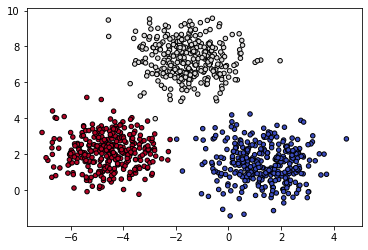

In [89]:
X, y = make_blobs(n_samples = 1000)
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.coolwarm, s = 20, edgecolor = 'k');

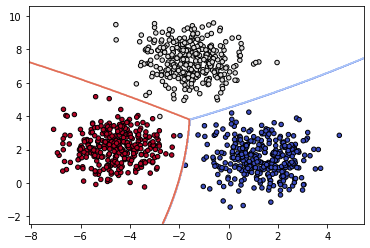

In [90]:
model = GaussianNB()
model.fit(X, y)

xx, yy = make_meshgrid(X[:, 0], X[:, 1])
plot_contours(model, xx, yy, cmap = plt.cm.coolwarm, alpha = 0.8)
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.coolwarm, s = 20, edgecolor = 'k');

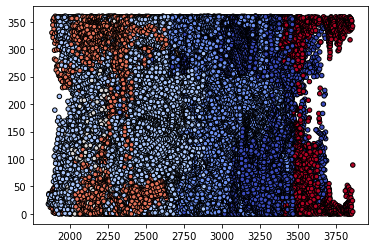

In [91]:
plt.scatter(covtype_X[:, 0], covtype_X[:, 1], c = covtype_y, cmap = plt.cm.coolwarm, s = 20, edgecolor = 'k');

# 2. 20Newsgroup 데이터

In [33]:
newsgroup = fetch_20newsgroups()
print(newsgroup.DESCR)

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`~sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality

In [35]:
newsgroup.data[:3]

["From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n",
 "From: guykuo@carson.u.washington.edu (Guy Kuo)\nSubject: SI Clock Poll - Final Call\nSummary: Final call for SI clock reports\nKeywords: SI,acceleration,clock,upgrade\nArticle-I.D.: shelley.1qvfo9INNc3s\nOrganization: University of Washington\nLines: 

In [37]:
newsgroup.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [108]:
newsgroup_train = fetch_20newsgroups(subset = 'train')
newsgroup_test = fetch_20newsgroups(subset = 'test')

In [109]:
X_train, y_train = newsgroup_train.data, newsgroup_train.target
X_test, y_test = newsgroup_test.data, newsgroup_test.target

## 2-1. CountVectorizer

In [110]:
count_vectorizer = CountVectorizer()

X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.fit_transform(X_test) 

In [45]:
print(X_train_count[0])

  (0, 56979)	3
  (0, 75358)	2
  (0, 123162)	2
  (0, 118280)	2
  (0, 50527)	2
  (0, 124031)	2
  (0, 85354)	1
  (0, 114688)	1
  (0, 111322)	1
  (0, 123984)	1
  (0, 37780)	5
  (0, 68532)	3
  (0, 114731)	5
  (0, 87620)	1
  (0, 95162)	1
  (0, 64095)	1
  (0, 98949)	1
  (0, 90379)	1
  (0, 118983)	1
  (0, 89362)	3
  (0, 79666)	1
  (0, 40998)	1
  (0, 92081)	1
  (0, 76032)	1
  (0, 4605)	1
  :	:
  (0, 37565)	1
  (0, 113986)	1
  (0, 83256)	1
  (0, 86001)	1
  (0, 51730)	1
  (0, 109271)	1
  (0, 128026)	1
  (0, 96144)	1
  (0, 78784)	1
  (0, 63363)	1
  (0, 90252)	1
  (0, 123989)	1
  (0, 67156)	1
  (0, 128402)	2
  (0, 62221)	1
  (0, 57308)	1
  (0, 76722)	1
  (0, 94362)	1
  (0, 78955)	1
  (0, 114428)	1
  (0, 66098)	1
  (0, 35187)	1
  (0, 35983)	1
  (0, 128420)	1
  (0, 86580)	1


## 2-2. HashingVectorizer

In [44]:
hash_vectorizer = HashingVectorizer(n_features = 1000)

X_train_hash = hash_vectorizer.fit_transform(X_train)
X_test_hash = hash_vectorizer.fit_transform(X_test)

In [47]:
print(X_train_hash[0])

  (0, 80)	-0.0642824346533225
  (0, 108)	0.0642824346533225
  (0, 111)	-0.128564869306645
  (0, 145)	0.0642824346533225
  (0, 158)	0.0642824346533225
  (0, 159)	-0.0642824346533225
  (0, 161)	0.0642824346533225
  (0, 165)	-0.0642824346533225
  (0, 171)	0.0642824346533225
  (0, 182)	0.0642824346533225
  (0, 195)	-0.0642824346533225
  (0, 196)	0.19284730395996752
  (0, 205)	-0.0642824346533225
  (0, 209)	0.0642824346533225
  (0, 234)	0.0642824346533225
  (0, 237)	0.0642824346533225
  (0, 248)	0.0642824346533225
  (0, 265)	0.19284730395996752
  (0, 274)	0.0642824346533225
  (0, 277)	0.19284730395996752
  (0, 284)	-0.0642824346533225
  (0, 286)	-0.0642824346533225
  (0, 296)	0.0642824346533225
  (0, 362)	-0.0642824346533225
  (0, 364)	-0.0642824346533225
  :	:
  (0, 739)	0.0
  (0, 761)	-0.0642824346533225
  (0, 766)	0.0642824346533225
  (0, 800)	-0.0642824346533225
  (0, 812)	-0.0642824346533225
  (0, 842)	0.0642824346533225
  (0, 848)	-0.0642824346533225
  (0, 851)	0.0642824346533225
  (0

## 2-3. TfidfVectorizer

In [60]:
tfidf_vectorizer = TfidfVectorizer()

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.fit_transform(X_test)

In [61]:
print(X_train_tfidf[0])

  (0, 86580)	0.13157118714240987
  (0, 128420)	0.04278499079283093
  (0, 35983)	0.03770448563619875
  (0, 35187)	0.09353930598317124
  (0, 66098)	0.09785515708314481
  (0, 114428)	0.05511105154696676
  (0, 78955)	0.05989856888061599
  (0, 94362)	0.055457031390147224
  (0, 76722)	0.06908779999621749
  (0, 57308)	0.1558717009157704
  (0, 62221)	0.02921527992427867
  (0, 128402)	0.05922294083277842
  (0, 67156)	0.07313443922740179
  (0, 123989)	0.08207027465330353
  (0, 90252)	0.031889368795417566
  (0, 63363)	0.08342748387969037
  (0, 78784)	0.0633940918806495
  (0, 96144)	0.10826904490745741
  (0, 128026)	0.060622095889758885
  (0, 109271)	0.10844724822064673
  (0, 51730)	0.09714744057976722
  (0, 86001)	0.07000411445838192
  (0, 83256)	0.08844382496462173
  (0, 113986)	0.17691750674853082
  (0, 37565)	0.03431760442478462
  :	:
  (0, 4605)	0.06332603952480323
  (0, 76032)	0.019219463052223086
  (0, 92081)	0.09913274493911223
  (0, 40998)	0.0780136819691811
  (0, 79666)	0.109364012524142

## 2-4. BernoulliNB + CountVec

In [111]:
model = BernoulliNB()
model.fit(X_train_count, y_train)

BernoulliNB()

In [112]:
pred = model.predict(X_train_count)
acc = metrics.accuracy_score(y_train, pred)
f1 = metrics.f1_score(y_train, pred, average = None)

print('Train Accuracy : ', acc)
print('Train F1 score : ', f1)

Train Accuracy :  0.7821283365741559
Train F1 score :  [0.80096502 0.8538398  0.13858268 0.70686337 0.85220126 0.87944493
 0.51627694 0.84532672 0.89064976 0.87179487 0.94561404 0.91331546
 0.84627832 0.89825848 0.9047619  0.79242424 0.84693878 0.84489796
 0.67329545 0.14742015]


## 2-5. BernoulliNB + HashingVec

In [114]:
model = BernoulliNB()
model.fit(X_train_hash, y_train)

BernoulliNB()

In [115]:
pred = model.predict(X_train_hash)
acc = metrics.accuracy_score(y_train, pred)
f1 = metrics.f1_score(y_train, pred, average = None)

print('Train Accuracy : ', acc)
print('Train F1 score : ', f1)

Train Accuracy :  0.5951917977726711
Train F1 score :  [0.74226804 0.49415205 0.45039019 0.59878155 0.57327935 0.63929619
 0.35390947 0.59851301 0.72695347 0.68123862 0.79809524 0.70532319
 0.54703833 0.66862745 0.61889927 0.74707471 0.6518668  0.60485269
 0.5324165  0.54576271]


In [116]:
pred = model.predict(X_test_hash)
acc = metrics.accuracy_score(y_test, pred)
f1 = metrics.f1_score(y_test, pred, average = None)

print('Train Accuracy : ', acc)
print('Train F1 score : ', f1)

Train Accuracy :  0.4430430164630908
Train F1 score :  [0.46678636 0.33826638 0.29391892 0.45743329 0.41939121 0.46540881
 0.34440068 0.46464646 0.62849873 0.53038674 0.63782051 0.55251799
 0.32635983 0.34266886 0.46105919 0.61780105 0.46197991 0.54591837
 0.27513228 0.3307888 ]


## 2-6. BernoulliNB + TfidfVec

In [117]:
model = BernoulliNB()
model.fit(X_train_tfidf, y_train)

BernoulliNB()

In [118]:
pred = model.predict(X_train_tfidf)
acc = metrics.accuracy_score(y_train, pred)
f1 = metrics.f1_score(y_train, pred, average = None)

print('Train Accuracy : ', acc)
print('Train F1 score : ', f1)

Train Accuracy :  0.7821283365741559
Train F1 score :  [0.80096502 0.8538398  0.13858268 0.70686337 0.85220126 0.87944493
 0.51627694 0.84532672 0.89064976 0.87179487 0.94561404 0.91331546
 0.84627832 0.89825848 0.9047619  0.79242424 0.84693878 0.84489796
 0.67329545 0.14742015]


## 2-7. MultinomialNB + CountVec

In [120]:
model = MultinomialNB()
model.fit(X_train_count, y_train)

MultinomialNB()

In [121]:
pred = model.predict(X_train_count)
acc = metrics.accuracy_score(y_train, pred)
f1 = metrics.f1_score(y_train, pred, average = None)

print('Train Accuracy : ', acc)
print('Train F1 score : ', f1)

Train Accuracy :  0.9245182959165635
Train F1 score :  [0.95228426 0.904      0.25073746 0.81402003 0.96669513 0.88350983
 0.90710383 0.97014925 0.98567818 0.99325464 0.98423237 0.95399516
 0.95703454 0.98319328 0.98584513 0.95352564 0.97307002 0.97467249
 0.95157895 0.86526946]


## 2-8. MultinomialNB + TfidfVec

In [123]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [124]:
pred = model.predict(X_train_tfidf)
acc = metrics.accuracy_score(y_train, pred)
f1 = metrics.f1_score(y_train, pred, average = None)

print('Train Accuracy : ', acc)
print('Train F1 score : ', f1)

Train Accuracy :  0.9326498143892522
Train F1 score :  [0.87404162 0.95414462 0.95726496 0.92863002 0.97812773 0.97440273
 0.91090909 0.97261411 0.98659966 0.98575021 0.98026316 0.94033413
 0.9594478  0.98032506 0.97755611 0.77411003 0.93506494 0.97453907
 0.90163934 0.45081967]
